# Проект: Исследование стартапов

## Введение

**Цель проекта:** Исследовать данные о фондах и раундах инвестирования в стартапы для разработки модели бизнеса финансовой компании.

**Задачи проекта:**
1. Загрузка данных и знакомство с ними.
2. Предобработка данных.
3. Исследовательский анализ данных.
4. Итоговые выводы.
    
**Описание данных:**

**Таблица acquisition** - содержит информацию о покупках одними компаниями других компаний:

id — идентификатор покупки.

acquiring_company_id — идентификатор покупающей компании.

acquired_company_id — идентификатор покупаемой компании.

term_code — варианты расчёта.

price_amount — сумма сделки.

acquired_at — дата сделки.

**Таблица company_and_rounds** - содержит информацию о компаниях и раундах финансирования:

company ID — идентификатор компании.

name — название компании.

category code — категория области деятельности компании.

status — статус компании.

founded at — дата инвестирования.

closed at — дата закрытия компании.

domain — официальный сайт компании.

network username — ник компании в сети.

country code — код страны компании.

investment rounds — число инвестиционных раундов.

funding rounds — число раундов финансирования.

funding total — сумма финансирования.

milestones — вехи финансирования.

funding round id — идентификатор этапа финансирования.

company id — идентификатор компании.

funded at — дата финансирования.

funding round type — тип финансирования.

raised amount — сумма финансирования.

pre money valuation — предварительная денежная оценка.

participants — число участников.

is first round — является ли раунд первым.

is last round — является раунд последним.

**Таблица education** - содержит информацию об образовании сотрудника:

id — идентификатор записи об образовании.

person_id — идентификатор работника.

instituition — название учебного заведения.

graduated_at — дата получения образования.

**Таблица people** - содержит информацию о сотрудниках:

id — идентификатор сотрудника.

first_name — имя сотрудника.

last_name — фамилия сотрудника.

company_id — идентификатор компании.

network_username — ник в социальных сетях.

**Таблица degrees** - содержит информацию о типе образования сотрудника:

id — идентификатор записи.

object_id — идентификатор сотрудника.

degree_type — тип образования.

subject — специальность.

**Содеражние проекта:**

1. Знакомство с данными и первичная предобработка
- Загрузка данных 
- Первичный анализ
- Обработка названий столбцов
- Смена типов данных
- Анализ пропусков

2. Предобработка данных и первичный анализ:
- Анализ раундов финансирования по годам
- Анализ сотрудников стартапов и их образования 
- Аанализ возможностей объединения датасетов
- Заполнение пропусков 

3. Исследовательский анализ 
- Объединение таблиц
- Анализ выбросов в данных 
- Анализ для ответов на исследовательские вопросы 

4. Итоговый вывод


## Шаг 1. Знакомство с данными: загрузка и первичная предобработка

Названия файлов:
* acquisition.csv
* company_and_rounds.csv
* people.csv
* education.csv
* degrees.csv

Опциональные датасеты:
* fund.csv
* investment.csv


Они находятся в папке datasets, если вы выполняете работу на платформе. В случае, если вы делаете работу локально, доступ к файлам в папке можно получить по адресу `https://code.s3.yandex.net/datasets/` + имя файла.

### 1.1. Вывод общей информации, исправление названия столбцов

- Загрузите все данные по проекту.
- Проверьте названия столбцов.
- Выведите информацию, которая необходима вам для принятия решений о предобработке, для каждого из датасетов.

In [1]:
# Импортируем все необходимые библиотеки 
! pip install phik
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
from phik import phik_matrix


In [2]:
# Загружаем таблицу acquisition и знакомимся с ней
df_acquisition = pd.read_csv ('https://code.s3.yandex.net/datasets/acquisition.csv')

In [3]:
df_acquisition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


In [4]:
df_acquisition.head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


In [5]:
# Названия столбцов в таблице acquisition релевантны 

In [6]:
# Загружаем таблицу company_and_rounds и знакомимся с ней

In [7]:
df_company_and_rounds = pd.read_csv ('https://code.s3.yandex.net/datasets/company_and_rounds.csv')

In [8]:
df_company_and_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217472 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

In [9]:
df_company_and_rounds.head()

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Названия столбцов в таблице company_and_rounds необходимо привести к типу snake_case. 
# Также стоит обратить внимание на два столбца с названием company ID и company id. 

In [11]:
# приводим названия столбцов к виду snake_case, заменяя пробелы на _
df_company_and_rounds.columns = df_company_and_rounds.columns.str.replace ('  ', ' ')
df_company_and_rounds.columns = df_company_and_rounds.columns.str.replace (' ', '_')
df_company_and_rounds.columns 
# приводим столбец company__ID к виду snake_case
df_company_and_rounds = df_company_and_rounds.rename(columns={'company__ID':'company__id'})
df_company_and_rounds.columns

Index(['company_ID', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants',
       'is_first_round', 'is_last_round'],
      dtype='object')

In [12]:
df_company_and_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   company_ID           217472 non-null  float64
 1   name                 217472 non-null  object 
 2   category_code        143886 non-null  object 
 3   status               217472 non-null  object 
 4   founded_at           109956 non-null  object 
 5   closed_at            3449 non-null    object 
 6   domain               147159 non-null  object 
 7   network_username     95534 non-null   object 
 8   country_code         108607 non-null  object 
 9   investment_rounds    217472 non-null  float64
 10  funding_rounds       217472 non-null  float64
 11  funding_total        217472 non-null  float64
 12  milestones           217472 non-null  float64
 13  funding_round_id     52928 non-null   float64
 14  company_id           52928 non-null   float64
 15  funded_at        

In [13]:
# Загружаем таблицу people и знакомимся с ней

In [14]:
df_people = pd.read_csv ('https://code.s3.yandex.net/datasets/people.csv')

In [15]:
df_people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


In [16]:
# Названия столбцов в таблице people релевантны 

In [17]:
df_people.head()

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


In [18]:
# Загружаем таблицу education и знакомимся с ней

In [19]:
df_education = pd.read_csv ('https://code.s3.yandex.net/datasets/education.csv')

In [20]:
df_education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


In [21]:
df_education.head()

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


In [22]:
# Названия столбцов в таблице education релевантны 

In [23]:
# Загружаем таблицу degrees и знакомимся с ней

In [24]:
df_degrees = pd.read_csv ('https://code.s3.yandex.net/datasets/degrees.csv')

In [25]:
df_degrees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


In [26]:
df_degrees.head()

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


In [27]:
# Названия столбцов в таблице degrees релевантны 

Было проведено знакомство со всеми таблицами 
Также были проверены все столбцы на релевантность названия и правильность написания. Названия столбцов в таблице company_and_rounds были приведены к типу snake_case. Также стоит обратить внимание на два столбца в данной таблице с названиями company ID и company id, эти столбцы дублируются по названию и по содержащимся в них данным.
Проблем с другими таблицами в данном контексте не выявлено.

### 1.2. Смена типов и анализ пропусков

- Обработайте типы данных в столбцах, которые хранят значения даты и времени, если это необходимо.
- Оцените полноту данных — сделайте предварительный вывод, достаточно ли данных для решения задач проекта.

In [28]:
# Меняем типы данных в таблице df_acquisition 

In [29]:
df_acquisition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


In [30]:
# Видно, что смена типа данных необходима в столбце acquired_at на datetime64, так как в столбце содержится дата

In [31]:
df_acquisition['acquired_at'] = df_acquisition['acquired_at'].astype('datetime64')

In [32]:
df_acquisition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9407 non-null   int64         
 1   acquiring_company_id  9407 non-null   int64         
 2   acquired_company_id   9407 non-null   int64         
 3   term_code             1831 non-null   object        
 4   price_amount          9407 non-null   int64         
 5   acquired_at           9378 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 441.1+ KB


In [33]:
df_acquisition.head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


In [34]:
# Меняем типы данных в таблице df_company_and_rounds

In [35]:
df_company_and_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   company_ID           217472 non-null  float64
 1   name                 217472 non-null  object 
 2   category_code        143886 non-null  object 
 3   status               217472 non-null  object 
 4   founded_at           109956 non-null  object 
 5   closed_at            3449 non-null    object 
 6   domain               147159 non-null  object 
 7   network_username     95534 non-null   object 
 8   country_code         108607 non-null  object 
 9   investment_rounds    217472 non-null  float64
 10  funding_rounds       217472 non-null  float64
 11  funding_total        217472 non-null  float64
 12  milestones           217472 non-null  float64
 13  funding_round_id     52928 non-null   float64
 14  company_id           52928 non-null   float64
 15  funded_at        

In [36]:
# Смена типа данных необходима в столбцах, где записаны даты: founded__at, closed__at, funded__at. Менять будем на тип данных datetime64 

In [37]:
for column in ['founded_at','closed_at','funded_at']:
    df_company_and_rounds[column] = df_company_and_rounds[column].astype('datetime64')

In [38]:
df_company_and_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_ID           217472 non-null  float64       
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_

In [39]:
# Проблема с типом данных даты также обнаружена в таблице df_education в столбце graduated_at 

In [40]:
df_education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


In [41]:
df_education['graduated_at'] = df_education['graduated_at'].astype('datetime64')

In [42]:
df_education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            109610 non-null  int64         
 1   person_id     109610 non-null  int64         
 2   instituition  109555 non-null  object        
 3   graduated_at  58054 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.3+ MB


In [43]:
# Типы данных были заменены. Перейдем к анализу пропусков в таблицах

In [44]:
# Считаем абсолютное кол-во пропусков в таблице df_acquisition 
df_acquisition.isna().sum()

id                         0
acquiring_company_id       0
acquired_company_id        0
term_code               7576
price_amount               0
acquired_at               29
dtype: int64

In [45]:
# Считаем относительное кол-во пропусков в таблице df_acquisition 
round(df_acquisition.isna().mean(),3)

id                      0.000
acquiring_company_id    0.000
acquired_company_id     0.000
term_code               0.805
price_amount            0.000
acquired_at             0.003
dtype: float64

In [46]:
# Найдены пропуски в столбце term_code и acquired_at. В столбце term_code пропусков значительное количество - 80%, а в столбце acquired_at - пропуски не значительны

In [47]:
# Считаем абсолютное кол-во пропусков в таблице df_company_and_rounds 
df_company_and_rounds.isna().sum()

company_ID                302
name                      302
category_code           73888
status                    302
founded_at             107818
closed_at              214325
domain                  70615
network_username       122240
country_code           109167
investment_rounds         302
funding_rounds            302
funding_total             302
milestones                302
funding_round_id       164846
company_id             164846
funded_at              165094
funding_round_type     164846
raised_amount          164846
pre_money_valuation    164846
participants           164846
is_first_round         164846
is_last_round          164846
dtype: int64

In [48]:
# Считаем относительное кол-во пропусков в таблице df_company_and_rounds
round(df_company_and_rounds.isna().sum()/len(df_company_and_rounds),3)

company_ID             0.001
name                   0.001
category_code          0.339
status                 0.001
founded_at             0.495
closed_at              0.984
domain                 0.324
network_username       0.561
country_code           0.501
investment_rounds      0.001
funding_rounds         0.001
funding_total          0.001
milestones             0.001
funding_round_id       0.757
company_id             0.757
funded_at              0.758
funding_round_type     0.757
raised_amount          0.757
pre_money_valuation    0.757
participants           0.757
is_first_round         0.757
is_last_round          0.757
dtype: float64

In [49]:
# Во всех столбцах таблицы найдены пропуски, в большинстве пропусков значительное количество 

In [50]:
# Считаем абсолютное кол-во пропусков в таблице df_people
df_people.isna().sum()

id                       0
first_name               5
last_name                1
company_id          192094
network_username    187842
dtype: int64

In [51]:
# Считаем относительное кол-во пропусков в таблице df_people
round(df_people.isna().sum()/len(df_people),3)

id                  0.000
first_name          0.000
last_name           0.000
company_id          0.847
network_username    0.829
dtype: float64

In [52]:
# В столбцах company_id и network_username найдено значительное количество пропусков - 80%

In [53]:
# Считаем абсолютное кол-во пропусков в таблице df_education
df_education.isna().sum()

id                  0
person_id           0
instituition       55
graduated_at    51556
dtype: int64

In [54]:
# Считаем относительное кол-во пропусков в таблице df_education
round(df_education.isna().sum()/len(df_education),3)

id              0.000
person_id       0.000
instituition    0.001
graduated_at    0.470
dtype: float64

In [55]:
# В столбцах instituition и graduated_at найдены пропуски. В столбце graduated_at их значительное количество - 40%

In [56]:
# Считаем абсолютное кол-во пропусков в таблице df_degrees
df_degrees.isna().sum()

id                 0
object_id          0
degree_type    11218
subject        28312
dtype: int64

In [57]:
# Считаем относительное кол-во пропусков в таблице df_education
round(df_degrees.isna().sum()/len(df_degrees),3)

id             0.000
object_id      0.000
degree_type    0.102
subject        0.258
dtype: float64

In [58]:
# Пропуски найдены в столбцах degree_type и subject - 10% и 25% соответсвенно 

В каждой таблице найдены пропуски в значительном количество, однако для целей данного исследования представленных данных достаточно 

## Шаг 2. Предобработка данных, предварительное исследование


### 2.1. Раунды финансирования по годам

Задание необходимо выполнить без объединения и дополнительной предобработки на основе датасета `company_and_rounds.csv`.

- Составьте сводную таблицу по годам, в которой на основании столбца `raised_amount` для каждого года указан:
    - типичный размер средств, выделяемый в рамках одного раунда;
    - общее количество раундов финансирования за этот год.
    
- Оставьте в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.
- На основе получившейся таблицы постройте график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

На основе полученных данных ответьте на вопросы:

- В каком году типичный размер собранных в рамках одного раунда средств был максимален?
- Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году?

In [59]:
# Выделяем год из даты финансирования 
df_company_and_rounds['funded_year'] = df_company_and_rounds['funded_at'].dt.year
df_company_and_rounds.info()
df_company_and_rounds.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_ID           217472 non-null  float64       
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,funded_year
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0,2005.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0,2007.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0,2008.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
# Строим сводную таблицу
funded_pivot_table = df_company_and_rounds.pivot_table(index = 'funded_year', 
                                                        values = 'raised_amount', 
                                                        aggfunc = ['median', 'count']).reset_index()
display(funded_pivot_table)

,funded_year,median,count
,,raised_amount,raised_amount
0,1960.0,0.0,9
1,1973.0,0.0,1
2,1974.0,0.0,2
3,1984.0,41000.0,3
4,1985.0,0.0,1
5,1987.0,1250000.0,2
6,1989.0,15000.0,1
7,1990.0,1000000.0,1
8,1992.0,2000000.0,1


In [61]:
# Переименовываем столбцы в сводной таблице
funded_pivot_table.columns = ['funded_year','typical_amount','total_rounds']
display(funded_pivot_table)

,funded_year,typical_amount,total_rounds
0,1960.0,0.0,9
1,1973.0,0.0,1
2,1974.0,0.0,2
3,1984.0,41000.0,3
4,1985.0,0.0,1
5,1987.0,1250000.0,2
6,1989.0,15000.0,1
7,1990.0,1000000.0,1
8,1992.0,2000000.0,1
9,1993.0,62500.0,2


In [62]:
# Оставляем данные, где раундов больше 50
funded_pivot_table = funded_pivot_table[funded_pivot_table['total_rounds'] > 50]
display (funded_pivot_table)

,funded_year,typical_amount,total_rounds
15,1999.0,2000000.0,76
16,2000.0,4200000.0,125
17,2001.0,3000000.0,96
18,2002.0,4200000.0,116
19,2003.0,3000000.0,159
20,2004.0,5000000.0,291
21,2005.0,5500000.0,1633
22,2006.0,5000000.0,2436
23,2007.0,3973320.0,3279
24,2008.0,3110000.0,3774


In [63]:
# Строим линейный график для отображения изменения 

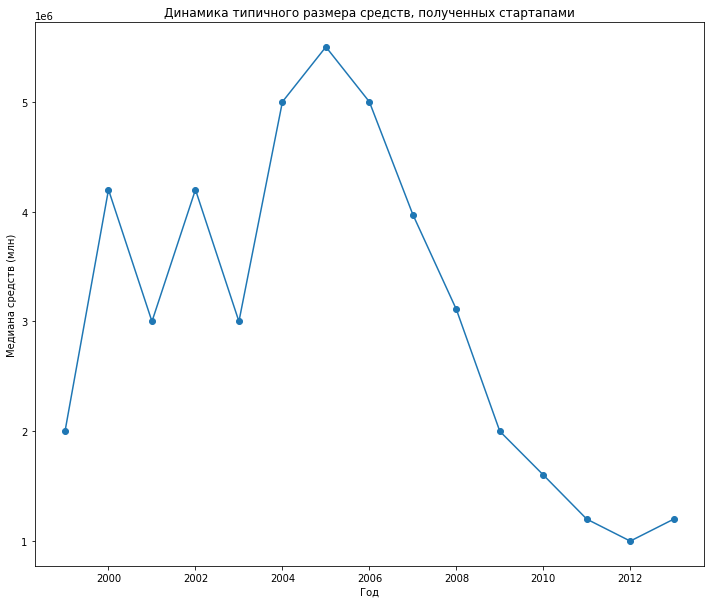

In [64]:
funded_pivot_table.plot(kind = 'line',
                        x = 'funded_year',
                        y = 'typical_amount',
                        title = 'Динамика типичного размера средств, полученных стартапами',
                        legend = False,
                        figsize = (12,10),
                       marker = 'o',
                       ylabel = 'Медиана средств (млн)',
                       xlabel = 'Год');

1. Как мы видим по результатам сводной таблицы и на графике - максимальный размер финансирования был достигнут в 2005 году и составил 5500000.
2. График четко показывает тенденцию на снижение типичной суммы средств в рамках одного этапа финансирования, падение которое началось после пика в 2005 году, что же касается количества проведенных раундов, то видно, что оно растет с каждым годом. Ситуация на 2013 год показывает небольшое поднятие типичной цены финансирования до 1200000 и самое большое количество проведенных раундов - 11072

Эти данные могут говорить о тенденции на увелечение количества старатапов, нуждающихся в финансировании, но при этом на уменьшение суммы этого финансирования, что создает большую конкуренцию среди стартапов 


### 2.2. Люди и их образование

Заказчик хочет понять, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний.

- Оцените, насколько информация об образовании сотрудников полна. Используя датасеты `people.csv` и `education.csv`, разделите все компании на несколько групп по количеству сотрудников и оцените среднюю долю сотрудников без информации об образовании в каждой из групп. Обоснуйте выбранные границы групп.
- Оцените, возможно ли для выполнения задания присоединить к этим таблицам ещё и таблицу `degrees.csv`.

In [65]:
# Объединяем датафрейм df.people и df.education
df_people_education = df_people.merge(df_education, left_on = 'id', right_on = 'person_id', how = 'inner')
df_people_education.info()
df_people_education.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109056 entries, 0 to 109055
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id_x              109056 non-null  int64         
 1   first_name        109056 non-null  object        
 2   last_name         109056 non-null  object        
 3   company_id        28638 non-null   float64       
 4   network_username  33575 non-null   object        
 5   id_y              109056 non-null  int64         
 6   person_id         109056 non-null  int64         
 7   instituition      109002 non-null  object        
 8   graduated_at      57691 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 8.3+ MB


,id_x,first_name,last_name,company_id,network_username,id_y,person_id,instituition,graduated_at
0,10,Mark,Zuckerberg,5.0,NaN,2415,10,Harvard University,NaT
1,100006,Courtney,Homer,81558.0,jobsbostontech,83604,100006,MIT Sloan School of Management,2004-01-01
2,100013,Umesh,Singh,NaN,NaN,36786,100013,Rutgers University,NaT
3,100013,Umesh,Singh,NaN,NaN,36787,100013,University of Mumbai,NaT
4,100018,Adam,Beckerman,148554.0,adam_beckerman,14433,100018,"Columbia University, Business School",2004-01-01


In [66]:
# Переименуем столбец id_y, который хранит идентификатор об образовании и дублируется с id сотрудника

df_people_education = df_people_education.rename(columns = {'id_y':'id_education',
                                                           'id_x':'id'})
df_people_education.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109056 entries, 0 to 109055
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                109056 non-null  int64         
 1   first_name        109056 non-null  object        
 2   last_name         109056 non-null  object        
 3   company_id        28638 non-null   float64       
 4   network_username  33575 non-null   object        
 5   id_education      109056 non-null  int64         
 6   person_id         109056 non-null  int64         
 7   instituition      109002 non-null  object        
 8   graduated_at      57691 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 8.3+ MB


In [67]:
# Также удалим один из из дублирующихся столбцов с id сотрудника
df_people_education.drop('person_id', axis=1, inplace = True)
df_people_education.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109056 entries, 0 to 109055
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                109056 non-null  int64         
 1   first_name        109056 non-null  object        
 2   last_name         109056 non-null  object        
 3   company_id        28638 non-null   float64       
 4   network_username  33575 non-null   object        
 5   id_education      109056 non-null  int64         
 6   instituition      109002 non-null  object        
 7   graduated_at      57691 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 7.5+ MB


In [68]:
# Добавляем столбец с признаком отсутсвия образования.
# Проверим пропуски в столбце graduated_at, так как, если отсутствует дата окончания вуза, скорей всего образование не было получено, либо еще идет 

In [69]:
df_people_education['no_education'] = df_people_education['graduated_at'].isna()
df_people_education.info()
df_people_education.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109056 entries, 0 to 109055
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                109056 non-null  int64         
 1   first_name        109056 non-null  object        
 2   last_name         109056 non-null  object        
 3   company_id        28638 non-null   float64       
 4   network_username  33575 non-null   object        
 5   id_education      109056 non-null  int64         
 6   instituition      109002 non-null  object        
 7   graduated_at      57691 non-null   datetime64[ns]
 8   no_education      109056 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 7.6+ MB


,id,first_name,last_name,company_id,network_username,id_education,instituition,graduated_at,no_education
0,10,Mark,Zuckerberg,5.0,NaN,2415,Harvard University,NaT,True
1,100006,Courtney,Homer,81558.0,jobsbostontech,83604,MIT Sloan School of Management,2004-01-01,False
2,100013,Umesh,Singh,NaN,NaN,36786,Rutgers University,NaT,True
3,100013,Umesh,Singh,NaN,NaN,36787,University of Mumbai,NaT,True
4,100018,Adam,Beckerman,148554.0,adam_beckerman,14433,"Columbia University, Business School",2004-01-01,False


In [70]:
# Группируем данные по компаниям и считаем сотрудников 

In [71]:
df_grouped_education = df_people_education.groupby('company_id').agg({'id':'count',
                                                                      'no_education':'sum'}).reset_index()
display(df_grouped_education)

,company_id,id,no_education
0,1.0,2,2
1,2.0,1,0
2,3.0,4,1
3,4.0,17,3
4,5.0,68,33
...,...,...,...
13414,285473.0,2,2
13415,285897.0,2,1
13416,285972.0,1,1
13417,285996.0,1,1


In [72]:
# Вычисляем долю сотрудников без образования 
df_grouped_education['no_education'] = round(df_grouped_education['no_education'] / df_grouped_education['id'],2)
display(df_grouped_education)

,company_id,id,no_education
0,1.0,2,1.00
1,2.0,1,0.00
2,3.0,4,0.25
3,4.0,17,0.18
4,5.0,68,0.49
...,...,...,...
13414,285473.0,2,1.00
13415,285897.0,2,0.50
13416,285972.0,1,1.00
13417,285996.0,1,1.00


In [73]:
# Делим предприятия на категории в зависимости от кол-ва сотрудников.
# Для разделения постараемся разделить данные на равные группы
# 1 сотрудник - микропредприятие, 2-5 - малые, 6-10 = средние, 11~ крупные
df_grouped_education['size_com'] = pd.cut(df_grouped_education['id'], 
                                          bins = [0,1,5,10,float('inf')], 
                                          labels = ['Микропредприятия', 'Малые', 'Средние', 'Крупные'])
display(df_grouped_education)

,company_id,id,no_education,size_com
0,1.0,2,1.00,Малые
1,2.0,1,0.00,Микропредприятия
2,3.0,4,0.25,Малые
3,4.0,17,0.18,Крупные
4,5.0,68,0.49,Крупные
...,...,...,...,...
13414,285473.0,2,1.00,Малые
13415,285897.0,2,0.50,Малые
13416,285972.0,1,1.00,Микропредприятия
13417,285996.0,1,1.00,Микропредприятия


In [74]:
# Группируем данные по размеру предприятий 
df_grouped_education = df_grouped_education.groupby('size_com').agg({'company_id':'count',
                                             'id':'sum',
                                              'no_education':'mean'}).reset_index()
display(df_grouped_education)

,size_com,company_id,id,no_education
0,Микропредприятия,6650,6650,0.201805
1,Малые,6251,15979,0.247727
2,Средние,395,2830,0.341924
3,Крупные,123,3179,0.404228


In [75]:
# Переименуем столбцы для удобства 
df_grouped_education.columns = ['size_company','company_count','stuff_count','no_education']
display(df_grouped_education)

,size_company,company_count,stuff_count,no_education
0,Микропредприятия,6650,6650,0.201805
1,Малые,6251,15979,0.247727
2,Средние,395,2830,0.341924
3,Крупные,123,3179,0.404228


In [76]:
# Оцениваем возможность присоединение к датасету df_people_education датасет df_degrees

In [77]:
df_degrees.info()
df_degrees.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


In [78]:
df_people_education.info()
df_people_education.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109056 entries, 0 to 109055
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                109056 non-null  int64         
 1   first_name        109056 non-null  object        
 2   last_name         109056 non-null  object        
 3   company_id        28638 non-null   float64       
 4   network_username  33575 non-null   object        
 5   id_education      109056 non-null  int64         
 6   instituition      109002 non-null  object        
 7   graduated_at      57691 non-null   datetime64[ns]
 8   no_education      109056 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 7.6+ MB


,id,first_name,last_name,company_id,network_username,id_education,instituition,graduated_at,no_education
0,10,Mark,Zuckerberg,5.0,NaN,2415,Harvard University,NaT,True
1,100006,Courtney,Homer,81558.0,jobsbostontech,83604,MIT Sloan School of Management,2004-01-01,False
2,100013,Umesh,Singh,NaN,NaN,36786,Rutgers University,NaT,True
3,100013,Umesh,Singh,NaN,NaN,36787,University of Mumbai,NaT,True
4,100018,Adam,Beckerman,148554.0,adam_beckerman,14433,"Columbia University, Business School",2004-01-01,False


In [79]:
# Стоит обратить внимание на столбцы object_id в df_degrees и id в df_people_education. 
# Проверим совпадения между столбцами 
degrees = [6117, 6136, 6005, 5832]
check = df_people_education.query('id in @degrees')
display (check)

,id,first_name,last_name,company_id,network_username,id_education,instituition,graduated_at,no_education
94234,5832,David,Peters,2033.0,NaN,5,Rice University,NaT,True
94920,6005,Sridhar,Gundaiah,2360.0,NaN,4,University of Greenwich,2006-01-01,False
95316,6117,Maurice,Rompre,2430.0,NaN,1,NaN,NaT,True
95390,6136,John,Green,2454.0,NaN,2,"Washington University, St. Louis",1990-01-01,False
95391,6136,John,Green,2454.0,NaN,3,Boston University,1992-01-01,False


1. При анализе предприятий по кол-ву сотрудников, мы видим, что самое большое количество является микропредприятиями - это 6650, в которых всего один сотрудник. среди них нет записей об оконченном образовании у 20% сотрудников, это достаточно большое количество. Тоже самое касается малых предприятий, среди сотрудников нет записей об образовании у 24% - это значительный показатель. Средних и крупных предприятий незначительное кол-во, всего 395 и 193 соответвенно, среди сотрудников этих предприятий нет записей об образовании у примерно 34% и 40% сотрудников. В целом это значительные показатели отсутсвия образования у сотрудников, но у микропредприятий самый низкий показатель, возможно, потому что сотрудниками таких старатапов в основном являются их основатели, которые с большей вероятностью имеют оконченное образование 
2. При анализе таблицы df_degrees на возможность присоединения её к объединенному датафрейму df_people_education, такая возможности выявлена, так как столбцы соответсвующие идентификаторам сотрудников соответсуют друг другу, однако в датасете df_degrees тип данных object в столбце object_id из-за некоректной записи, перед каждым число стоит приставка 'p:', поэтому перед присоединением этого датасета стоит привести столбец к типу данных int64 и удалить из записи лишние символы

### 2.3. Объединять или не объединять — вот в чём вопрос

Некоторые названия столбцов встречаются в датасетах чаще других. В результате предварительной проверки датасетов было выяснено, что столбец `company_id` подходит для объединения данных.

- Установите, подходит ли для объединения данных столбец `network_username`, который встречается в нескольких датасетах. Нам необходимо понимать, дублируется ли для разных датасетов информация в столбцах с таким названием, и если да — то насколько часто.
- Оцените, можно ли использовать столбцы с именем `network_username` для объединения данных.

In [80]:
# Проверяем все датасеты, в которых присутствует столбец network_username

In [81]:
df_people.info()
df_people.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


In [82]:
df_company_and_rounds.info()
df_company_and_rounds.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_ID           217472 non-null  float64       
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,funded_year
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0,2005.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0,2007.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0,2008.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
# Найдем пересечения между данными столбцов, через преобразование в множества 
df_intersection = len(set(df_company_and_rounds['network_username']).intersection(set(df_people['network_username'])))
display(df_intersection)

2200

In [84]:
# Найдем долю пересечения 
round(df_intersection/(len(set(df_company_and_rounds['network_username'])) + len(set(df_people['network_username']))),2)

0.02

Как мы видим столбец network_username присутствует в двух датасетах - df_company_and_rounds и df_people. При проверке этих датасетов видно, что связь между одинаково названными столбцами минимальна, процент пересечния уникальных значений всего 2%. В случае с датасетом df_company_and_rounds столбец содержит информацию о нике в соц.сетях компании, а в случае с датасетом df_people столбец содержит ник конкретного человека. Для объединение датасетов по данным столбцам данных не достаточно 


### 2.4. Проблемный датасет и причина возникновения пропусков

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `company_and_rounds.csv`. В нём много пропусков как раз в информации о раундах, которая заказчику важна.

- Любым удобным способом приведите данные в вид, который позволит в дальнейшем проводить анализ в разрезе отдельных компаний. Обратите внимание на структуру датасета, порядок и названия столбцов, проанализируйте значения.

По гипотезе заказчика данные по компаниям из этой таблицы раньше хранились иначе, более удобным для исследования образом.

- Максимальным образом сохраняя данные, сохранив их связность и исключив возможные возникающие при этом ошибки, подготовьте данные так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию без промежуточных агрегаций.

In [85]:
# Еще раз проанализируем датасет df_company_and_rounds

In [86]:
df_company_and_rounds.info()
df_company_and_rounds.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_ID           217472 non-null  float64       
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,funded_year
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0,2005.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0,2007.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0,2008.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Мы видим, что данные в датасете явно разделены по кол-ву не нулевых строк. В первой части данные держаться примерно на уровне 217472 значений, а вот, начиная со столбца  funding_round_id не нулевых значений в столбцах около 52928, кроме того в двух условных частях дублируются столбцы с company_id, и столбцы с информацией о сумме финансирования. Это говорит о том, что датасет составлен из двух отдельных датасетов и для удобства разделим их. Первая таблица будет рассказывать о данных компании, а вторая о каждом этапе финансирования в отдельности 

In [87]:
# Создаем датасет с информацией о компании 
company_info = df_company_and_rounds[['company_ID',
                                     'name', 
                                     'category_code', 
                                     'status', 
                                     'founded_at', 
                                     'closed_at', 
                                     'domain', 
                                     'network_username',
                                     'country_code',
                                      'investment_rounds',
                                    'funding_rounds',
                                    'funding_total',
                                    'milestones']]

In [88]:
# Удалим дуликаты в датасете
company_info.drop_duplicates(subset=None, keep='first', inplace=True)
company_info.info()
company_info.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196554 entries, 0 to 217472
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_ID         196553 non-null  float64       
 1   name               196553 non-null  object        
 2   category_code      123186 non-null  object        
 3   status             196553 non-null  object        
 4   founded_at         91227 non-null   datetime64[ns]
 5   closed_at          2620 non-null    datetime64[ns]
 6   domain             126545 non-null  object        
 7   network_username   80591 non-null   object        
 8   country_code       87990 non-null   object        
 9   investment_rounds  196553 non-null  float64       
 10  funding_rounds     196553 non-null  float64       
 11  funding_total      196553 non-null  float64       
 12  milestones         196553 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object(6)


/tmp/ipykernel_390/519831341.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_info.drop_duplicates(subset=None, keep='first', inplace=True)


,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0
5,10000.0,MYWEBBO,network_hosting,operating,2008-07-26,NaT,mywebbo.com,NaN,NaN,0.0,0.0,0.0,0.0
6,10001.0,THE Movie Streamer,games_video,operating,2008-07-26,NaT,themoviestreamer.com,NaN,NaN,0.0,0.0,0.0,0.0


In [89]:
company_info.duplicated().sum()

0

In [90]:
# Создаем столбец с информацией о этапе финансирования
funding_info = df_company_and_rounds[['funding_round_id',
                                      'company_id',
                                      'funded_at',
                                      'funding_round_type',
                                      'raised_amount',
                                      'pre_money_valuation',
                                      'participants',
                                      'is_first_round',
                                      'is_last_round',
                                      'funded_year']]

In [91]:
# Удалим дубликаты 
funding_info.drop_duplicates(subset=None, keep='first', inplace=True)
funding_info.info()
funding_info.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52929 entries, 0 to 217773
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   funding_round_id     52928 non-null  float64       
 1   company_id           52928 non-null  float64       
 2   funded_at            52680 non-null  datetime64[ns]
 3   funding_round_type   52928 non-null  object        
 4   raised_amount        52928 non-null  float64       
 5   pre_money_valuation  52928 non-null  float64       
 6   participants         52928 non-null  float64       
 7   is_first_round       52928 non-null  float64       
 8   is_last_round        52928 non-null  float64       
 9   funded_year          52680 non-null  float64       
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 4.4+ MB


/tmp/ipykernel_390/1218326637.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  funding_info.drop_duplicates(subset=None, keep='first', inplace=True)


,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,funded_year
0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0,2005.0
1,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0,2007.0
2,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0,2008.0
3,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,1644.0,1001.0,2008-02-26,series-a,5000000.0,0.0,3.0,1.0,1.0,2008.0


 Мы сохранили данные и привели их к более удобному формату, разделив один датасет на два.

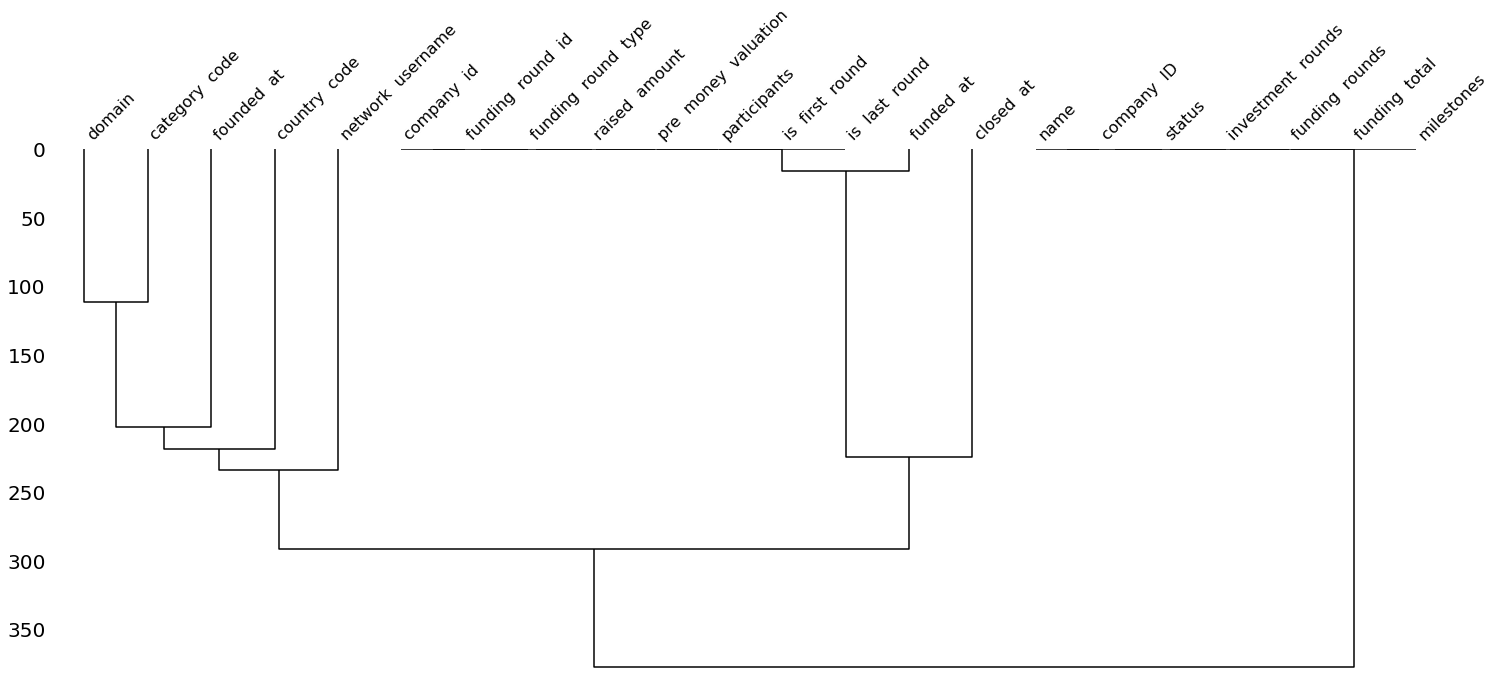

In [92]:
# Код ревьюера
# Метод dendrogram из библиотеки missingno
!pip install missingno -q
import missingno as msno
df_company_and_rounds_12 = pd.read_csv(r'https://code.s3.yandex.net/datasets/company_and_rounds.csv')
msno.dendrogram(df_company_and_rounds_12)
plt.show()


## Шаг 3. Исследовательский анализ объединённых таблиц

> Приступите к шагу 3 после проверки ревьюера.

<big>Студентам нужно чётко сказать - проверять дальше или не проверять.</big>


### 3.1. Объединение данных

Объедините данные для ответа на вопросы заказчика, которые касаются интересующих его компаний. Заказчика прежде всего интересуют те компании, которые меняли или готовы менять владельцев. Получение инвестиций или финансирования, по мнению заказчика, означает интерес к покупке или продаже компании.

В качестве основы для объединённой таблицы возьмите данные из обработанного датасета `company_and_rounds.csv` — выберите только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, или те, у которых в колонке `status` указано `acquired`. В результирующей таблице должно получиться порядка 40 тысяч компаний.

Проверьте полноту и корректность получившейся таблицы. Далее работайте только с этими данными.

In [93]:
# Объединяем датасет company_info и funding_info
df = company_info.merge(df_acquisition, left_on = 'company_ID', right_on = 'acquired_company_id', how = 'left')

In [94]:
# Проводим фильтрацию по условиям 
df = (df[(df['funding_rounds'] > 0) 
        | (df['investment_rounds'] > 0) 
        | (df['status'] == 'acquired')].reset_index()
)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40890 entries, 0 to 40889
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   index                 40890 non-null  int64         
 1   company_ID            40890 non-null  float64       
 2   name                  40890 non-null  object        
 3   category_code         35436 non-null  object        
 4   status                40890 non-null  object        
 5   founded_at            27911 non-null  datetime64[ns]
 6   closed_at             2128 non-null   datetime64[ns]
 7   domain                35883 non-null  object        
 8   network_username      20938 non-null  object        
 9   country_code          34858 non-null  object        
 10  investment_rounds     40890 non-null  float64       
 11  funding_rounds        40890 non-null  float64       
 12  funding_total         40890 non-null  float64       
 13  milestones      

,index,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,NaN,NaN,NaN,NaN,NaN,NaT
1,1,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0,1.0,11.0,10.0,NaN,20000000.0,2007-05-30
2,2,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0,20.0,377.0,100.0,cash,0.0,2005-05-29
3,13,1001.0,FriendFeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,USA,0.0,1.0,5000000.0,3.0,1901.0,5.0,1001.0,cash_and_stock,47500000.0,2009-08-10
4,18,10014.0,Mobclix,mobile,acquired,2008-03-01,NaT,mobclix.com,mobclix,USA,0.0,1.0,0.0,4.0,3878.0,23054.0,10014.0,NaN,0.0,2010-09-30


Создали датасет путём объединения company_info и df_acquisition, чтобы отобрать  компании, которые меняли или готовы менять владельцев. 
Отфильтровали датасет, чтобы оставить  только те компании, у которых указаны значения funding_rounds или investment_rounds больше нуля, или те, у которых в колонке status указано acquired. В результирующей таблиц получилось 40890 компаний.


### 3.2. Анализ выбросов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

- По предобработанному столбцу `funding_total` графическим способом оцените, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся.
- В процессе расчёта значений обратите внимание, например, на показатели, возвращаемые методом `.describe()`, — объясните их. Применимы ли к таким данным обычные способы нахождения типичных значений?

In [95]:
# Задаем формат для чисел с плавающей точкой 
pd.options.display.float_format = '{:.2f}'.format

In [96]:
# Выводим описание столбца funding_total
df['funding_total'].describe()

count        40890.00
mean      10135585.95
std       56412886.91
min              0.00
25%              0.00
50%         600000.00
75%        5631320.00
max     5700000000.00
Name: funding_total, dtype: float64

Text(0.5, 0, 'Сумма финансирования')

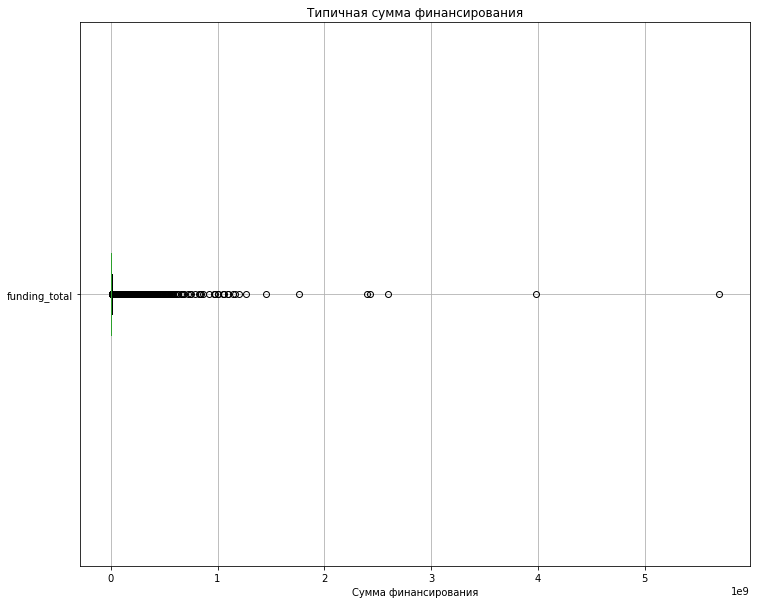

In [97]:
# Строим "ящик с усами" на основе столлбца funding_total
df.boxplot(column = 'funding_total', vert = False, figsize = (12,10))
plt.title('Типичная сумма финансирования')
plt.xlabel('Сумма финансирования')


На основе полученных данных видна неоднородность в данных и длинный правый ус, что говорит о сильной ассиметрии в распределении данных.
Среднее значение значительно больше медианы, что говорит о аномально высоком финансировании некоторых компаний.
Из-за выбросов среднее не отражает типичный случай, поэтому для этой цели стоит использовать медиану равную 600 000, то есть 50% значений находятся ниже ее и 50% выше 
25% компаний имеют финансирование 0, возможно это стартапы, которые держутся на "идее"


### 3.3. Куплены забесплатно?

- Исследуйте компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.

- Рассчитайте аналитически верхнюю и нижнюю границу выбросов для столбца `funding_total` и укажите, каким процентилям границы соответствуют.

In [98]:
# фильтруем данные, чтобы оставить компании, которые проданы за ноль или 1$
df_null = (df[(df['funding_total'] > 0) 
        & ((df['price_amount'] == 0) 
        | (df['price_amount'] == 1))].reset_index()
)
df_null.info()
df_null.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1618 entries, 0 to 1617
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   level_0               1618 non-null   int64         
 1   index                 1618 non-null   int64         
 2   company_ID            1618 non-null   float64       
 3   name                  1618 non-null   object        
 4   category_code         1553 non-null   object        
 5   status                1618 non-null   object        
 6   founded_at            1285 non-null   datetime64[ns]
 7   closed_at             13 non-null     datetime64[ns]
 8   domain                1546 non-null   object        
 9   network_username      812 non-null    object        
 10  country_code          1536 non-null   object        
 11  investment_rounds     1618 non-null   float64       
 12  funding_rounds        1618 non-null   float64       
 13  funding_total     

,level_0,index,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,...,investment_rounds,funding_rounds,funding_total,milestones,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,25,66,10054.00,Jumptap,mobile,acquired,2005-01-01,NaT,jumptap.com,jumptap,...,0.00,7.00,121500000.00,3.00,9288.00,23283.00,10054.00,cash_and_stock,0.00,2013-08-13
1,63,170,101312.00,SideTour,web,acquired,2011-06-01,NaT,sidetour.com,sidetour,...,0.00,3.00,4000000.00,2.00,9653.00,11391.00,101312.00,NaN,0.00,2013-09-18
2,66,177,101340.00,ChoicePass,enterprise,acquired,2011-07-01,NaT,choicepass.com,choicepass,...,0.00,1.00,250000.00,1.00,7272.00,1972.00,101340.00,NaN,0.00,2012-06-18
3,67,181,10137.00,Producteev,software,acquired,2008-07-08,NaT,producteev.com,producteev,...,0.00,3.00,1310000.00,2.00,8254.00,757.00,10137.00,cash_and_stock,0.00,2012-11-05
4,68,184,10139.00,TradeCard,enterprise,acquired,1999-01-01,NaT,tradecard.com,TradeCard,...,0.00,2.00,44925000.00,1.00,9326.00,44008.00,10139.00,NaN,0.00,2013-04-01


In [99]:
# Рассчитаем верхние и нижние границы усов столбца funding_total, полученного датасета
lower_value = df_null['funding_total'].quantile(0.25) - 1.5 * (df_null['funding_total'].quantile(0.75) - df_null['funding_total'].quantile(0.25))
higher_value = df_null['funding_total'].quantile(0.75) + 1.5 * (df_null['funding_total'].quantile(0.75) - df_null['funding_total'].quantile(0.25))
print (lower_value, higher_value)

-18250000.0 35750000.0


In [100]:
# Находим какому процентилю соответсвует верхний порог выбросов 
df_null['funding_total'].describe(percentiles = [0.25,0.30,0.35,0.40,0.45,0.50,0.70,0.90,0.91])


count         1618.00
mean      18152961.94
std      144503027.47
min           3750.00
25%        2000000.00
30%        2600000.00
35%        3299116.50
40%        4000000.00
45%        5000000.00
50%        6000000.00
70%       13000000.00
90%       33015810.00
91%       35894000.00
max     5700000000.00
Name: funding_total, dtype: float64

После фильтрации датасета по условиям осталось 1618 фирм - это фирмы проданные "за бесплатно", но при этом имеющие финансирование 
при рассчете нижних и верхних границ выбросов на основе столбца funding_total, видно, что аномально низких значений в данных нет, так как значение нижней границы является отрицательным, что невозможно, так как минимальное больше нуля.
Что касается верхней границе выбросов, то оно принимает значение 35 750 000, что является примерно 91 процентилем.

In [109]:
# Код ревьюера
(df_null[df_null['funding_total'] < higher_value].shape[0] / df_null.shape[0]) * 100

90.91470951792337


### 3.4. Цены стартапов по категориям

Категории стартапов с типично высокими ценами покупки стартапов и значительным разбросом цен могут быть привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделите категории стартапов, характеризующиеся:

- типично высокими ценами;
- и наибольшим разбросом цен за стартап.

Объясните, почему решили составить топ именно из такого числа категорий и почему рассчитывали именно так.

In [101]:
df['price_amount'].describe(percentiles = [0.25,0.50,0.75,0.80,0.90,0.95,0.97])

count            9390.00
mean        393988145.31
std       26846244613.76
min                 0.00
25%                 0.00
50%                 0.00
75%             23625.50
80%          11820000.00
90%         119000000.00
95%         359100000.00
97%         650000000.00
max     2600000000000.00
Name: price_amount, dtype: float64

In [102]:
# Для корректности данных отфильтруем их по 97 процентилю, чтобы убрать выбросы
percentiles = df['price_amount'].quantile(0.97)
df_price = df[df['price_amount'] <= percentiles]
df_price['price_amount'].describe()

count        9111.00
mean     26539770.00
std      86478159.19
min             0.00
25%             0.00
50%             0.00
75%             0.00
max     650000000.00
Name: price_amount, dtype: float64

In [103]:
# Группируем стартапы по их категориям 
df_grouped = df_price.groupby('category_code').agg({'price_amount': ['median','std']}).reset_index()
display(df_grouped)

category_code price_amount             
                           median          std
0        advertising         0.00  89174926.01
1          analytics         0.00  52671642.49
2         automotive         0.00  24826061.58
3            biotech   2550000.00 169375277.48
4          cleantech         0.00 115900151.70
5         consulting         0.00  80448171.02
6             design         0.00         0.00
7          ecommerce         0.00  99516434.39
8          education         0.00   8559050.29
9         enterprise         0.00  72520987.00
10           fashion         0.00  95742908.59
11           finance         0.00 154774321.13
12       games_video         0.00  76829028.95
13          hardware         0.00 114904746.49
14            health         0.00 116149013.48
15       hospitality  11250000.00 187219682.01
16             legal         0.00         0.00
17             local         0.00   9318548.81
18     manufacturing  15650000.00 197019525.17
19           medical         0.00 105950927.12
20         messaging         0.00  42412773.23
21            mobile         0.00  88767678.78
22             music         0.00  72198580.46
23          nanotech 584000000.00          NaN
24   network_hosting         0.00  95064030.30
25              news         0.00  70965628.09
26         nonprofit         0.00          NaN
27             other         0.00  80220088.17
28       photo_video         0.00  24228551.90
29  public_relations         0.00 113333518.10
30       real_estate  21500000.00  25473842.79
31            search         0.00  75328727.21
32          security         0.00 112569870.18
33     semiconductor         0.00 109795563.36
34            social         0.00  31859746.73
35          software         0.00  74806848.05
36            sports         0.00 130000000.00
37    transportation         0.00  92610294.60
38            travel         0.00  50446297.66
39               web         0.00  86593825.51

In [104]:
# Переименуем столбцы для удобства 
df_grouped.columns = ['category','price_median', 'price_std'] 
display (df_grouped)

,category,price_median,price_std
0,advertising,0.00,89174926.01
1,analytics,0.00,52671642.49
2,automotive,0.00,24826061.58
3,biotech,2550000.00,169375277.48
4,cleantech,0.00,115900151.70
5,consulting,0.00,80448171.02
6,design,0.00,0.00
7,ecommerce,0.00,99516434.39
8,education,0.00,8559050.29
9,enterprise,0.00,72520987.00


In [105]:
# Cортируем данные по медиане и выделяем те, что характеризуются типично высокими ценами
df_grouped = df_grouped.sort_values(by = 'price_median', ascending = False)
df_top_median = df_grouped[0:5]
display (df_top_median)

,category,price_median,price_std
23,nanotech,584000000.00,NaN
30,real_estate,21500000.00,25473842.79
18,manufacturing,15650000.00,197019525.17
15,hospitality,11250000.00,187219682.01
3,biotech,2550000.00,169375277.48


In [106]:
# Cортируем данные по стандартному отклонению и выделяем те, что характеризуются наибольшим разбросом цен за стартап
df_grouped = df_grouped.sort_values(by = 'price_std', ascending = False)
df_top_std = df_grouped[0:19]
display (df_top_std)

,category,price_median,price_std
18,manufacturing,15650000.00,197019525.17
15,hospitality,11250000.00,187219682.01
3,biotech,2550000.00,169375277.48
11,finance,0.00,154774321.13
36,sports,0.00,130000000.00
14,health,0.00,116149013.48
4,cleantech,0.00,115900151.70
13,hardware,0.00,114904746.49
29,public_relations,0.00,113333518.10
32,security,0.00,112569870.18


Мы сгруппировали все стартапы по категориям и вывели 2 топа:
1. В топе с типично высокими ценами за стартап мы использовали для расчета медиану, так как среднее значение не может представлять типичную картину из-за значительных выбросов. В топ мы вывели 5 категорий, так как в остальных медиана равна нулю, что не отвечает условиям. В топ попали следующие категории:

```category	price_median	    price_std
23	nanotech	584000000.00	NaN
30	real_estate	21500000.00	    25473842.79
18	manufacturing	15650000.00	197019525.17
15	hospitality	11250000.00	    187219682.01
3	biotech	2550000.00	        169375277.48
   ```
Как мы видим в данный топ попали наиболее востребованные направления, в которых присутствуют деньги (нанотех, производство, недвижиность и т.д.)

2. Топ с наибольшем разбросом цен мы также составили из 19 категорий, так как представленные отклонения больше стандартного отклонения по всему столбцу, однако пересечения с первым топом есть только у трех категорий:

``` 
   category	price_median	      price_std
18	manufacturing	15650000.00	  197019525.17
15	hospitality	11250000.00	      187219682.01
3	biotech	2550000.00	          169375277.48

```

Как мы видим есть пересечния с первым топом, это категории : manufacturing, hospitality, biotech. Что может говорить о том, что цена за стартап в данных категориях имеет большой разброс от низких до огромных вложений, это касается и других категорий данного топа, так как медиана их цены - 0, что говорит о значительных выбросах в категориях, когда один стартап условно продан за 0, а другой за н число млрд.

   


### 3.5. Сколько раундов продержится стартап перед покупкой

- Необходимо проанализировать столбец `funding_rounds`. Исследуйте значения столбца. Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа.
- Постройте график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы. Сделайте выводы.

In [107]:
# рассчитываем типичное количество раундов для каждого статуса стартапа 
grouped_status = df.groupby('status')['funding_rounds'].mean().sort_values()
display (grouped_status)

status
acquired    0.53
closed      1.38
operating   1.52
ipo         1.93
Name: funding_rounds, dtype: float64

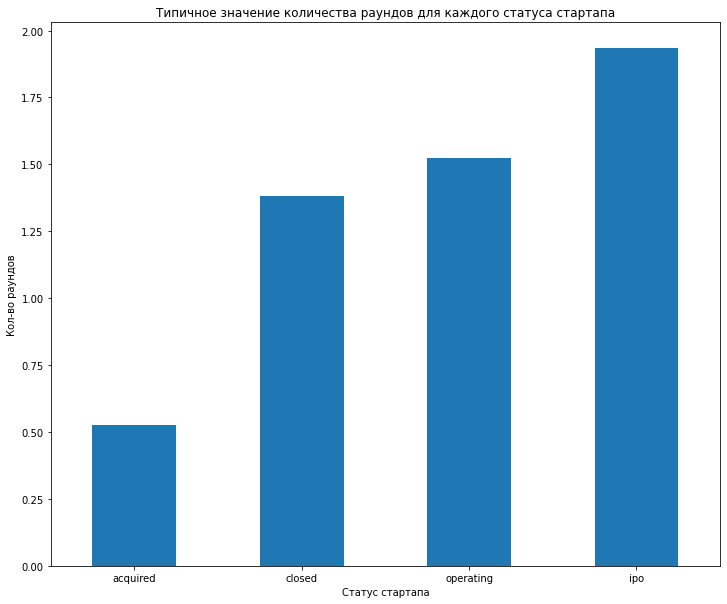

In [108]:
# Построим график, который визуализирует результаты
grouped_status.plot(kind='bar',
               title='Типичное значение количества раундов для каждого статуса стартапа',
               legend=False,
               ylabel='Кол-во раундов',
               xlabel='Статус стартапа',
               rot=0,
               figsize=(12, 10));

В данных видна связь между статусом стартапа и средний кол-вом пройденных раундов финасирования

acquired, то есть купленные стартапы прошли в среднем меньше одного этапа финасирования, что говорит о их перспективности, так как выгодно купить стартап до того, как он успел масштабироваться

closed, то есть стартапы, который закрылись и не выдержали конкуренции на рынке успевают пройти примерно 1 этап финансирования   

operating, то есть те стартапы, которые продолжают существовать и развиваться прошли примерно 1.5 раунда финансирования, они масштабируются, но еще не достигли конечной точки 

ipo или стартапы, который вышли на биржу они в среднем прошли 2 этапа финансирования.

Данные показывают, что перспективные стартапы покупают практически сразу, остальные должны пройти примерно 2 эатапа финансирования, чтобы выйти на биржу. 


## Шаг 4. Итоговый вывод и рекомендации

Опишите, что было сделано в проекте, какие были сделаны выводы, подкрепляют ли они друг друга или заставляют сомневаться в полученных результатах.

В ходе работы были выполнены все поставленные задачи:

-**Было осуществлено знакомство с данными и была проведена их оценка**

-**Данные были проверены на корректность. Найдены ошибки в написании столбцов, столбцы приведены к типу snake_case. В каждой таблице найдены пропуски в значительном количество, однако для целей данного исследования представленных данных достаточно**

-**Была проведена предобработка данных и предварительное исследование, в ходе которого было сделано следубщее:**
1. Была выявлена тенденции на увелечение количества старатапов, нуждающихся в финансировании, но при этом на уменьшение суммы этого финансирования, что создает большую конкуренцию среди стартапов.
2. Были выявлены значительные показатели отсутствия образования у сотрудников стартапов (около 20%), но у микропредприятий(1 сотрудник) самый низкий показатель, возможно, потому что сотрудниками таких старатапов в основном являются их основатели, которые с большей вероятностью имеют оконченное образование.
3. При анализе таблицы df_degrees на возможность присоединения её к объединенному датафрейму df_people_education, такая возможности выявлена, но перед присоединением этого датасета стоит привести столбец к типу данных int64 и удалить из записи лишние символы.
4. Как мы видим столбец network_username присутствует в двух датасетах - df_company_and_rounds и df_people. При проверке этих датасетов видно, что связь между одинаково названными столбцами минимальна, процент пересечния уникальных значений всего 2%, для объединение датасетов по данным столбцам данных не достаточно.
5. Для удобства заказчика датасет company_and_rounds был преобразован в два: company_info и funding_info, что позволило сохранить данные и привести их к более удобному формату

-**Были получены ответы на все представленные в ходе исследования вопросы**:
1. Был создан датасет путём объединения company_info и df_acquisition, чтобы отобрать компании, которые меняли или готовы менять владельцев. Датасет был отфильтрован по требуемым условиям для дальнейшей работы. В результирующей таблиц получилось 40890 компаний.
2. На основе полученного датасета при анализе суммы финансирования стартапов видна неоднородность в данных и длинный правый ус, что говорит о сильной ассиметрии в распределении данных. Среднее значение значительно больше медианы, что говорит о аномально высоком финансировании некоторых компаний. Из-за выбросов среднее не отражает типичный случай, поэтому для этой цели стоит использовать медиану равную 600 000, то есть 50% значений находятся ниже ее и 50% выше 25% компаний имеют финансирование 0, возможно это стартапы, которые держутся на "идее".
3. Был проведен анализ фирм купленых за 0 или 1 доллар. Это 1618 фирм - это фирмы проданные "за бесплатно", но при этом имеющие финансирование. При рассчете нижних и верхних границ выбросов на основе столбца funding_total, видно, что аномально низких значений в данных нет, что касается верхней границе выбросов, то оно принимает значение 35 750 000, что является примерно 91 процентилем.
4. Данные были сгруппированы по категориям стартапов и была рассчитан типичная сумма покупки стартапа и типичное стандартное отклонение. В топе с типично высокими ценами за стартап мы использовали для расчета медиану, так как среднее значение не может представлять типичную картину из-за значительных выбросов. В данный топ попали наиболее востребованные направления, в которых присутствуют деньги (нанотех, производство, недвижиность и т.д.).Топ с наибольшем разбросом цен мы  сосnавили из 19 категорий, так как представленные отклонения больше стандартного отклонения по всему столбцу. Видно пересечение в двух топах, это категории : manufacturing, hospitality, biotech. Что может говорить о том, что цена за стартап в данных категориях имеет большой разброс от низких до огромных вложений.
5. Также мы обнаружили связь между статусом стартапа и средним количество раундов финансирования. Данные показывают, что перспективные стартапы покупают практически сразу, остальные должны пройти примерно 2 эатапа финансирования, чтобы выйти на биржу.

В целом можно сказать, что в данных видна неоднородность, так как присутствуют большие выбросы почти во всех значениях, однако это специфика направления дестельности, в которой есть большой разброс предприятий, их продукции и методов, поэтому следует аккуратно заходить на данные рынок и выбирать наиболее доступные и перспективные направления 